##### Copyright 2020 Google

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Precomputed analysis

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/experiments/qaoa/precomputed_analysis"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/ReCirq/blob/master/docs/qaoa/precomputed_analysis.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/ReCirq/blob/master/docs/qaoa/precomputed_analysis.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/ReCirq/docs/qaoa/precomputed_analysis.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

Use precomputed optimal angles to measure the expected value of $\langle C \rangle$ across a variety of problem types, sizes, $p$-depth, and random instances.

## Setup

Install the ReCirq package:

In [2]:
try:
    import recirq
except ImportError:
    !pip install git+https://github.com/quantumlib/ReCirq

Now import Cirq, ReCirq and the module dependencies:

In [3]:
import recirq
import cirq
import numpy as np
import pandas as pd

## Load the raw data

Go through each record, load in supporting objects, flatten everything into records, and put into a massive dataframe.

In [4]:
from recirq.qaoa.experiments.precomputed_execution_tasks import \
    DEFAULT_BASE_DIR, DEFAULT_PROBLEM_GENERATION_BASE_DIR, DEFAULT_PRECOMPUTATION_BASE_DIR

records = []
for record in recirq.iterload_records(dataset_id="2020-03-tutorial", base_dir=DEFAULT_BASE_DIR):
    dc_task = record['task']
    apre_task = dc_task.precomputation_task
    pgen_task = apre_task.generation_task
    
    problem = recirq.load(pgen_task, base_dir=DEFAULT_PROBLEM_GENERATION_BASE_DIR)['problem']
    record['problem'] = problem.graph
    record['problem_type'] = problem.__class__.__name__
    record['optimum'] = recirq.load(apre_task, base_dir=DEFAULT_PRECOMPUTATION_BASE_DIR)['optimum']
    record['bitstrings'] = record['bitstrings'].bits
    recirq.flatten_dataclass_into_record(record, 'task')
    recirq.flatten_dataclass_into_record(record, 'precomputation_task')    
    recirq.flatten_dataclass_into_record(record, 'generation_task')    
    recirq.flatten_dataclass_into_record(record, 'optimum')
    records.append(record)
df_raw = pd.DataFrame(records)    
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'])
df_raw.head()

timestamp  \
0 2020-04-08 13:11:32.151452   
1 2020-04-08 13:11:32.520129   
2 2020-04-08 13:11:31.499590   
3 2020-04-08 13:11:31.077127   
4 2020-04-08 13:11:31.247321   

                                          bitstrings  \
0  [[0, 0, 0, 0], [0, 0, 1, 0], [1, 1, 1, 1], [0,...   
1  [[0, 1, 1, 0], [0, 0, 0, 1], [0, 0, 0, 0], [1,...   
2  [[0, 0, 0, 0], [1, 0, 1, 1], [0, 1, 0, 0], [1,...   
3  [[1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0...   
4  [[1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0...   

                             qubits                      final_qubits  \
0  [(5, 3), (6, 2), (6, 3), (6, 4)]  [(5, 3), (6, 2), (6, 3), (6, 4)]   
1  [(5, 3), (6, 2), (6, 3), (6, 4)]  [(5, 3), (6, 2), (6, 3), (6, 4)]   
2  [(5, 3), (6, 2), (6, 3), (6, 4)]  [(5, 3), (6, 2), (6, 3), (6, 4)]   
3                  [(5, 3), (6, 3)]                  [(5, 3), (6, 3)]   
4                  [(5, 3), (6, 3)]                  [(5, 3), (6, 3)]   

                                             circuit violation_indices  \
0  [(PhX(-0.824)^0.5((5, 3)), PhX(-0.824)^0.5((6,...                []   
1  [(PhX(-0.644)^0.39663553581308286((5, 3)), PhX...                []   
2  [(PhX(0.806)^0.3587079604881125((5, 3)), PhX(0...                []   
3  [(PhX(0.163)^0.27171459224559236((5, 3)), PhX(...                []   
4  [(PhX(-0.14)^0.5((5, 3)), PhX(-0.5)^0.5((6, 3)...                []   

        problem         problem_type        dataset_id      device_name  ...  \
0  (2, 0, 1, 3)  HardwareGridProblem  2020-03-tutorial  Syc23-simulator  ...   
1  (2, 0, 1, 3)  HardwareGridProblem  2020-03-tutorial  Syc23-simulator  ...   
2  (2, 0, 1, 3)  HardwareGridProblem  2020-03-tutorial  Syc23-simulator  ...   
3        (1, 0)  HardwareGridProblem  2020-03-tutorial  Syc23-simulator  ...   
4        (1, 0)  HardwareGridProblem  2020-03-tutorial  Syc23-simulator  ...   

   generation_task.dataset_id  generation_task.device_name  instance_i  \
0            2020-03-tutorial                   Sycamore23           4   
1            2020-03-tutorial                   Sycamore23           4   
2            2020-03-tutorial                   Sycamore23           4   
3            2020-03-tutorial                   Sycamore23           4   
4            2020-03-tutorial                   Sycamore23           4   

  n_qubits  optimum.p     f_val  \
0        4          2 -2.616073   
1        4          3 -3.000000   
2        4          1 -1.632993   
3        2          2 -1.000000   
4        2          3 -1.000000   

                                              gammas  \
0          [0.47109541452232295, 0.5900885654628348]   
1  [0.3047317419709853, 0.6664224586095869, 0.607...   
2                               [0.4776585668842565]   
3           [0.6283182637521854, 0.7853973288957912]   
4  [0.5620701143250424, 0.7076351823020001, 0.798...   

                                               betas  min_c  max_c  
0       [-0.44860990386986666, -0.29400122107756244]   -3.0    3.0  
1  [-0.5760240058080092, -0.36261585803438645, -0...   -3.0    3.0  
2                              [-0.3926990816996555]   -3.0    3.0  
3        [-0.3926989532796281, -0.07854016690845925]   -1.0    1.0  
4  [-0.4199391572618354, -0.1086414306397252, -0....   -1.0    1.0  

[5 rows x 25 columns]

## Narrow down to relevant data

Drop unnecessary metadata and use bitstrings to compute the expected value of the energy. In general, it's better to save the raw data and lots of metadata so we can use it if it becomes necessary in the future.

In [5]:
from recirq.qaoa.simulation import hamiltonian_objectives, hamiltonian_objective_avg_and_err
import cirq.google as cg

def compute_energy_w_err(row):
    permutation = []
    for i, q in enumerate(row['qubits']):
        fi = row['final_qubits'].index(q)
        permutation.append(fi)
    
    energy, err = hamiltonian_objective_avg_and_err(row['bitstrings'], row['problem'], permutation)
    return pd.Series([energy, err], index=['energy', 'err'])
    

# Start cleaning up the raw data
df = df_raw.copy()

# Don't need these columns for present analysis
df = df.drop(['gammas', 'betas', 'circuit', 'violation_indices',
              'precomputation_task.dataset_id',
              'generation_task.dataset_id',
              'generation_task.device_name'], axis=1)

# p is specified twice (from a parameter and from optimum)
assert (df['optimum.p'] == df['p']).all()
df = df.drop('optimum.p', axis=1)

# Compute energies
df = df.join(df.apply(compute_energy_w_err, axis=1))
df = df.drop(['bitstrings', 'qubits', 'final_qubits', 'problem'], axis=1)

# Normalize
df['energy_ratio'] = df['energy'] / df['min_c']
df['err_ratio'] = df['err'] * np.abs(1/df['min_c'])
df['f_val_ratio'] = df['f_val'] / df['min_c']

df

timestamp         problem_type        dataset_id  \
0   2020-04-08 13:11:32.151452  HardwareGridProblem  2020-03-tutorial   
1   2020-04-08 13:11:32.520129  HardwareGridProblem  2020-03-tutorial   
2   2020-04-08 13:11:31.499590  HardwareGridProblem  2020-03-tutorial   
3   2020-04-08 13:11:31.077127  HardwareGridProblem  2020-03-tutorial   
4   2020-04-08 13:11:31.247321  HardwareGridProblem  2020-03-tutorial   
..                         ...                  ...               ...   
145 2020-04-08 13:08:23.360051            SKProblem  2020-03-tutorial   
146 2020-04-08 13:08:16.029073            SKProblem  2020-03-tutorial   
147 2020-04-08 13:09:02.773520            SKProblem  2020-03-tutorial   
148 2020-04-08 13:09:06.524879            SKProblem  2020-03-tutorial   
149 2020-04-08 13:08:59.681882            SKProblem  2020-03-tutorial   

         device_name  n_shots  structured  echoed  p  instance_i  n_qubits  \
0    Syc23-simulator    50000        True   False  2           4         4   
1    Syc23-simulator    50000        True   False  3           4         4   
2    Syc23-simulator    50000        True   False  1           4         4   
3    Syc23-simulator    50000        True   False  2           4         2   
4    Syc23-simulator    50000        True   False  3           4         2   
..               ...      ...         ...     ... ..         ...       ...   
145  Syc23-simulator    50000        True   False  3           0         7   
146  Syc23-simulator    50000        True   False  1           0         7   
147  Syc23-simulator    50000        True   False  2           1         7   
148  Syc23-simulator    50000        True   False  3           1         7   
149  Syc23-simulator    50000        True   False  1           1         7   

        f_val  min_c  max_c   energy       err  energy_ratio  err_ratio  \
0   -2.616073   -3.0    3.0 -1.89004  0.007524      0.630013   0.002508   
1   -3.000000   -3.0    3.0 -1.85736  0.007451      0.619120   0.002484   
2   -1.632993   -3.0    3.0 -1.39456  0.007291      0.464853   0.002430   
3   -1.000000   -1.0    1.0 -0.89096  0.002031      0.890960   0.002031   
4   -1.000000   -1.0    1.0 -0.85592  0.002313      0.855920   0.002313   
..        ...    ...    ...      ...       ...           ...        ...   
145 -7.888209   -9.0   11.0 -1.53480  0.020784      0.170533   0.002309   
146 -5.318905   -9.0   11.0 -3.02000  0.019369      0.335556   0.002152   
147 -6.942368   -9.0   11.0 -2.36920  0.020491      0.263244   0.002277   
148 -7.888209   -9.0   11.0 -1.50696  0.020841      0.167440   0.002316   
149 -5.318905   -9.0   11.0 -3.04136  0.019464      0.337929   0.002163   

     f_val_ratio  
0       0.872024  
1       1.000000  
2       0.544331  
3       1.000000  
4       1.000000  
..           ...  
145     0.876468  
146     0.590989  
147     0.771374  
148     0.876468  
149     0.590989  

[150 rows x 18 columns]

## Plots

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_style('ticks')

plt.rc('axes', labelsize=16, titlesize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14, title_fontsize=16)

# theme colors
QBLUE = '#1967d2'
QRED = '#ea4335ff'
QGOLD = '#fbbc05ff'
QGREEN = '#34a853ff'

QGOLD2 = '#ffca28'
QBLUE2 = '#1e88e5'

In [7]:
C = r'\langle C \rangle'
CMIN = r'C_\mathrm{min}'
COVERCMIN = f'${C}/{CMIN}$'

In [8]:
def percentile(n):
    def percentile_(x):
        return np.nanpercentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

### Raw swarm plots of all data

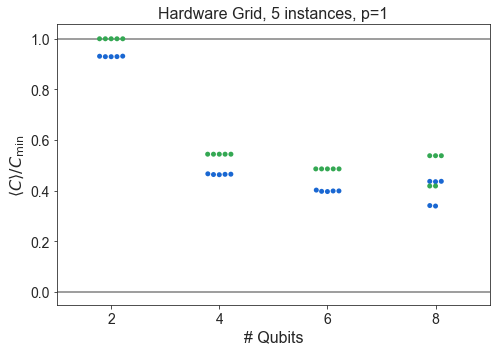

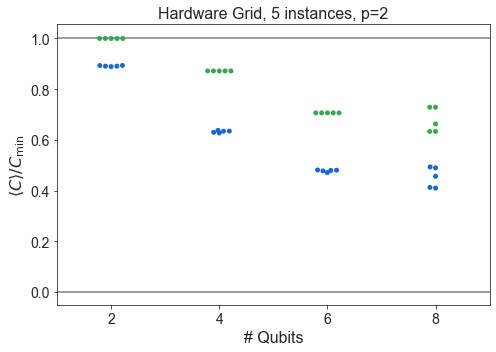

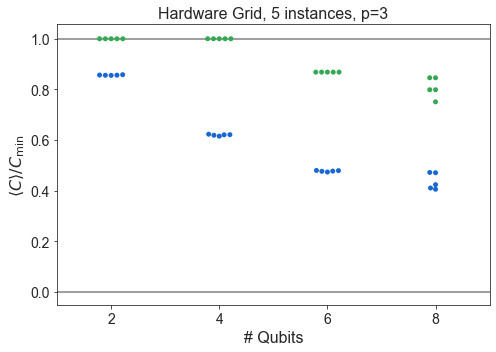

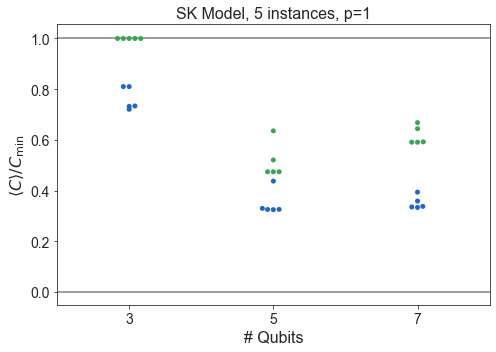

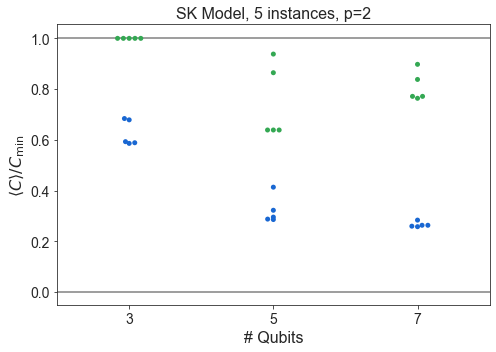

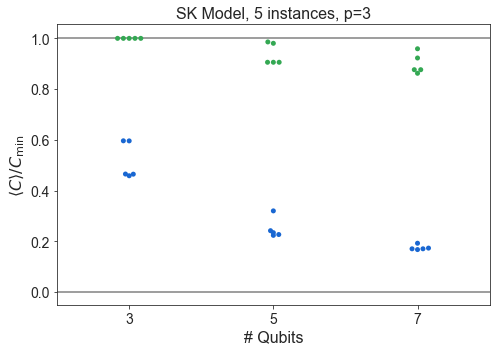

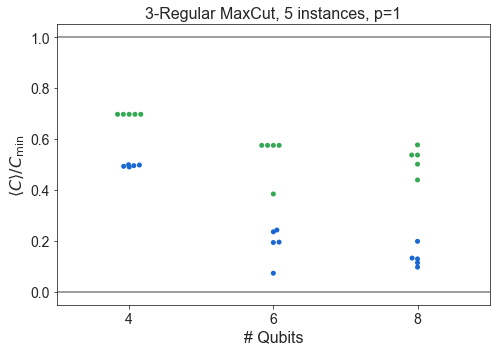

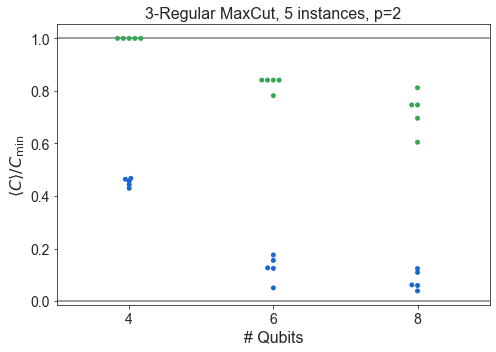

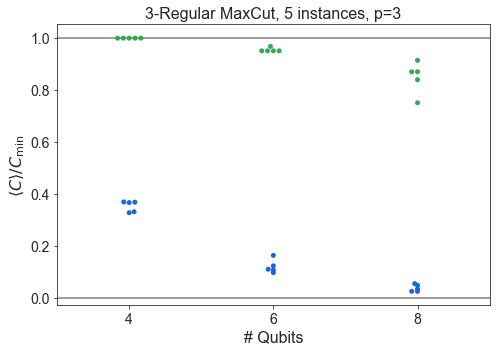

In [9]:
import numpy as np
from matplotlib import pyplot as plt

pretty_problem = {
    'HardwareGridProblem': 'Hardware Grid',
    'SKProblem': 'SK Model',
    'ThreeRegularProblem': '3-Regular MaxCut'
}

for problem_type in ['HardwareGridProblem', 'SKProblem', 'ThreeRegularProblem']:
    df1 = df
    df1 = df1[df1['problem_type'] == problem_type]

    for p in sorted(df1['p'].unique()):
        dfb = df1
        dfb = dfb[dfb['p'] == p]
        dfb = dfb.sort_values(by='n_qubits')    

        plt.subplots(figsize=(7,5))

        n_instances = dfb.groupby('n_qubits').count()['energy_ratio'].unique()
        if len(n_instances) == 1:
            n_instances = n_instances[0]
            label = f'{n_instances}'
        else:
            label = f'{min(n_instances)} - {max(n_instances)}'

        #sns.boxplot(dfb['n_qubits'], dfb['energy_ratio'], color=QBLUE, saturation=1)
        #sns.boxplot(dfb['n_qubits'], dfb['f_val_ratio'], color=QGREEN, saturation=1)
        sns.swarmplot(dfb['n_qubits'], dfb['energy_ratio'], color=QBLUE)
        sns.swarmplot(dfb['n_qubits'], dfb['f_val_ratio'], color=QGREEN)

        plt.axhline(1, color='grey', ls='-')
        plt.axhline(0, color='grey', ls='-')

        plt.title(f'{pretty_problem[problem_type]}, {label} instances, p={p}')
        plt.xlabel('# Qubits')
        plt.ylabel(COVERCMIN)
        plt.tight_layout()
        plt.show()


### Compare SK and hardware grid vs. n

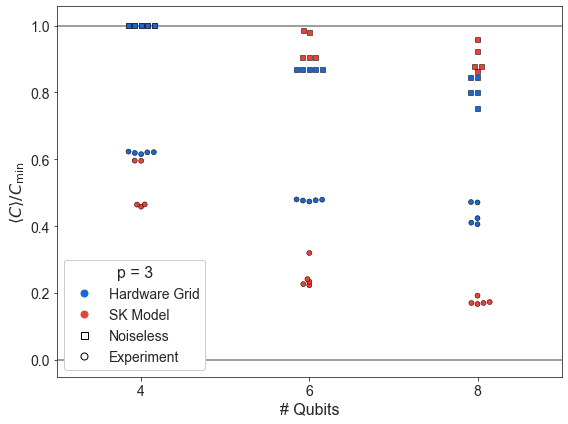

In [10]:
pretty_problem = {
    'HardwareGridProblem': 'Hardware Grid',
    'SKProblem': 'SK Model',
    'ThreeRegularProblem': '3-Regular MaxCut'
}

df1 = df
df1 = df1[
    ((df1['problem_type'] == 'SKProblem') & (df1['p'] == 3))
    | ((df1['problem_type'] == 'HardwareGridProblem') & (df1['p'] == 3))
    ]
df1 = df1.sort_values(by='n_qubits')

MINQ = 3
df1 = df1[df1['n_qubits'] >= MINQ]

plt.subplots(figsize=(8, 6))
plt.xlim((8, 23))

# SK
dfb = df1
dfb = dfb[dfb['problem_type'] == 'SKProblem']
sns.swarmplot(dfb['n_qubits'], dfb['energy_ratio'], s=5, linewidth=0.5, edgecolor='k', color=QRED)
sns.swarmplot(dfb['n_qubits'], dfb['f_val_ratio'], s=5, linewidth=0.5, edgecolor='k', color=QRED,
              marker='s')
dfg = dfb.groupby('n_qubits').mean().reset_index()
# --------


# Hardware
dfb = df1
dfb = dfb[dfb['problem_type'] == 'HardwareGridProblem']
sns.swarmplot(dfb['n_qubits'], dfb['energy_ratio'], s=5, linewidth=0.5, edgecolor='k', color=QBLUE)
sns.swarmplot(dfb['n_qubits'], dfb['f_val_ratio'], s=5, linewidth=0.5, edgecolor='k', color=QBLUE,
              marker='s')
dfg = dfb.groupby('n_qubits').mean().reset_index()
# -------


plt.axhline(1, color='grey', ls='-')
plt.axhline(0, color='grey', ls='-')

plt.xlabel('# Qubits')
plt.ylabel(COVERCMIN)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

lelements = [
    Line2D([0], [0], color=QBLUE, marker='o', ms=7, ls='', ),
    Line2D([0], [0], color=QRED, marker='o', ms=7, ls='', ),

    Line2D([0], [0], color='k', marker='s', ms=7, ls='', markerfacecolor='none'),
    Line2D([0], [0], color='k', marker='o', ms=7, ls='', markerfacecolor='none'),
]

plt.legend(lelements, ['Hardware Grid', 'SK Model', 'Noiseless', 'Experiment', ], loc='best',
           title=f'p = 3',
           handler_map={tuple: HandlerTuple(ndivide=None)}, framealpha=1.0)
plt.tight_layout()
plt.show()

### Hardware grid vs. p

In [11]:
dfb = df
dfb = dfb[dfb['problem_type'] == 'HardwareGridProblem']
dfb = dfb[['p', 'instance_i', 'n_qubits', 'energy_ratio', 'f_val_ratio']]
P_LIMIT = max(dfb['p'])

def max_over_p(group):
    i = group['energy_ratio'].idxmax()
    return group.loc[i][['energy_ratio', 'p']]

def count_p(group):
    new = {}
    for i, c in enumerate(np.bincount(group['p'], minlength=P_LIMIT+1)):
        if i == 0:
            continue
        new[f'p{i}'] = c
    return pd.Series(new)
    

dfgy = dfb.groupby(['n_qubits', 'instance_i']).apply(max_over_p).reset_index()
dfgz = dfgy.groupby(['n_qubits']).apply(count_p).reset_index()
# In the paper, we restrict to n > 10
# dfgz = dfgz[dfgz['n_qubits'] > 10]
dfgz = dfgz.set_index('n_qubits').sum(axis=0)
dfgz /= (dfgz.sum())
dfgz

p1    0.25
p2    0.60
p3    0.15
dtype: float64

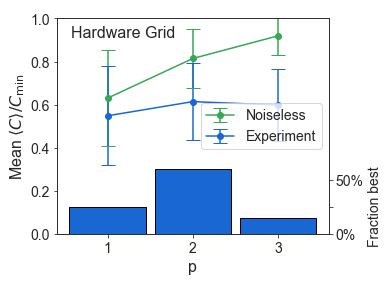

In [13]:
dfb = df
dfb = dfb[dfb['problem_type'] == 'HardwareGridProblem']
dfb = dfb[['p', 'instance_i', 'n_qubits', 'energy_ratio', 'f_val_ratio']]
# In the paper, we restrict to n > 10
# dfb = dfb[dfb['n_qubits'] > 10]
dfg = dfb.groupby('p').agg(['median', percentile(25), percentile(75), 'mean', 'std']).reset_index()

plt.subplots(figsize=(5.5,4))
plt.errorbar(x=dfg['p'], y=dfg['f_val_ratio', 'mean'],
             yerr=(dfg['f_val_ratio', 'std'],
                   dfg['f_val_ratio', 'std']),
             fmt='o-',
             capsize=7,
             color=QGREEN,
             label='Noiseless'
           )
plt.errorbar(x=dfg['p'], y=dfg['energy_ratio', 'mean'],
             yerr=(dfg['energy_ratio', 'std'],
                   dfg['energy_ratio', 'std']),
             fmt='o-',
             capsize=7,
             color=QBLUE,
             label='Experiment'
           )
plt.xlabel('p')
plt.ylabel('Mean ' + COVERCMIN)
plt.ylim((0, 1))
plt.text(0.05, 0.9, r'Hardware Grid', fontsize=16, transform=plt.gca().transAxes, ha='left', va='bottom')
plt.legend(loc='center right')

ax2 = plt.gca().twinx()  # instantiate a second axes that shares the same x-axis

dfgz_p = [int(s[1:]) for s in dfgz.index]
dfgz_y = dfgz.values
ax2.bar(dfgz_p, dfgz_y, color=QBLUE, width=0.9, lw=1, ec='k')
ax2.tick_params(axis='y')
ax2.set_ylim((0, 2))
ax2.set_yticks([0, 0.25, 0.50])
ax2.set_yticklabels(['0%', None, '50%'])
ax2.set_ylabel('Fraction best' + ' ' * 41, fontsize=14)

plt.tight_layout()